# 신경망

### 신경망을 위한 데이터 전처리하기

In [1]:
from sklearn import preprocessing
import numpy as np

features = np.array([[-100.1,3240.1],[-200.2,-234.1],[5000.5,150.1],[6000.6,-125.1],[9000.9,-673.1]])

scaler = preprocessing.StandardScaler()

features_standardized = scaler.fit_transform(features)

features_standardized

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

In [2]:
print('평균:', round(features_standardized[:,0].mean()))
print('표준편차:',features_standardized[:,0].std())

평균: 0.0
표준편차: 0.9999999999999999


### 신경망 구성하기

In [3]:
from keras import models
from keras import layers

network = models.Sequential()

network.add(layers.Dense(units = 16, activation = 'relu', input_shape = (10,)))

network.add(layers.Dense(units = 16,activation = 'relu'))

network.add(layers.Dense(units = 1, activation = 'sigmoid'))

network.compile(loss= 'niaary_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])

In [4]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                176       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


In [6]:
x = layers.Input(shape = (10,))
h1 = layers.Dense(units = 16, activation = 'relu')(x)
h2 = layers.Dense(units = 16, activation = 'relu')(h1)
y = layers.Dense(units = 1, activation = 'sigmoid')(h2)

network = models.Model(x,y)

network.compile(loss= 'binary_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])

In [7]:
network.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                176       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


### 이진 분류기 훈련하기

In [10]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models 
from keras import layers

np.random.seed(0)

number_of_features = 1000

(data_train, target_train),(data_test,target_test) = imdb.load_data(num_words= number_of_features)

tokenizer = Tokenizer(num_words = number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train,mode= 'binary')
features_test = tokenizer.sequences_to_matrix(data_test,mode = 'binary')

network = models.Sequential()

network.add(layers.Dense(units = 16, activation = 'relu',input_shape = (number_of_features,)))

network.add(layers.Dense(units = 16, activation = 'relu'))

network.add(layers.Dense(units = 1, activation = 'sigmoid'))

network.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])

history = network.fit(features_train,target_train,epochs = 3,verbose =1, batch_size = 100,validation_data = (features_test,target_test))

Epoch 1/3
250/250 [==============================] - 2s 6ms/step - loss: 0.4304 - accuracy: 0.8068 - val_loss: 0.3408 - val_accuracy: 0.8570
Epoch 2/3
250/250 [==============================] - 1s 4ms/step - loss: 0.3241 - accuracy: 0.8638 - val_loss: 0.3272 - val_accuracy: 0.8606
Epoch 3/3
250/250 [==============================] - 1s 5ms/step - loss: 0.3100 - accuracy: 0.8703 - val_loss: 0.3428 - val_accuracy: 0.8528


In [11]:
features_train.shape

(25000, 1000)

In [12]:
network.evaluate(features_test,target_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3428 - accuracy: 0.8528


[0.3427685499191284, 0.8528000116348267]

### 다중 분류기 훈련하기

In [14]:
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

np.random.seed(0)

number_of_features = 5000

data = reuters.load_data(num_words = number_of_features)
(data_train,target_vector_train),(data_test,target_vector_test) = data

tokenizer = Tokenizer(num_words = number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train,mode = 'binary')
features_test = tokenizer.sequences_to_matrix(data_test,mode = 'binary')

target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)

network = models.Sequential()

network.add(layers.Dense(units = 100, activation = 'relu',input_shape = (number_of_features,)))

network.add(layers.Dense(units = 100, activation = 'relu'))

network.add(layers.Dense(units = 46, activation = 'softmax'))

network.compile(loss= 'categorical_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])

history = network.fit(features_train,target_train,epochs = 3, verbose = 0, batch_size = 100, validation_data = (features_test,target_test))

### 회귀 모델 훈련하기

In [15]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

np.random.seed(0)

features,target = make_regression(n_samples = 10000, n_features = 3, n_informative = 3, n_targets = 1, noise = 0.0, random_state = 0)

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.33, random_state = 0)

network = models.Sequential()

network.add(layers.Dense(units = 32, activation = 'relu',input_shape = (features_train.shape[1],)))

network.add(layers.Dense(units = 32, activation = 'relu'))

network.add(layers.Dense(units = 1))

network.compile(loss = 'mse', optimizer = 'RMSprop', metrics = ['mse'])

history = network.fit(features_train, target_train, epochs = 10, verbose = 0, batch_size = 100, validation_data = (features_test,target_test))

### 예측하기

In [17]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

np.random.seed(0)

number_of_features = 10000

(data_train, target_train),(data_test,target_test) = imdb.load_data(num_words = number_of_features)

tokenizer = Tokenizer(num_words = number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode = 'binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode = 'binary')

network = models.Sequential()

network.add(layers.Dense(units = 16, activation = 'relu',input_shape = (number_of_features,)))

network.add(layers.Dense(units = 16, activation = 'relu'))

network.add(layers.Dense(units = 1, activation = 'sigmoid'))

network.compile(loss='binary_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])

history = network.fit(features_train,target_train,epochs = 3, verbose = 0,batch_size = 100, validation_data = (features_test, target_test) )

In [18]:
predicted_target = network.predict(features_test)

In [19]:
predicted_target 

array([[0.10062143],
       [0.9998364 ],
       [0.7523595 ],
       ...,
       [0.13302341],
       [0.05551028],
       [0.66508067]], dtype=float32)

In [20]:
predicted_target[0]

array([0.10062143], dtype=float32)

### 훈련기록 시각화하기

Epoch 1/15
25/25 [==============================] - 2s 77ms/step - loss: 0.5166 - accuracy: 0.7816 - val_loss: 0.4258 - val_accuracy: 0.8305
Epoch 2/15
25/25 [==============================] - 1s 36ms/step - loss: 0.3217 - accuracy: 0.8945 - val_loss: 0.3224 - val_accuracy: 0.8818
Epoch 3/15
25/25 [==============================] - 1s 34ms/step - loss: 0.2424 - accuracy: 0.9200 - val_loss: 0.2935 - val_accuracy: 0.8866
Epoch 4/15
25/25 [==============================] - 1s 33ms/step - loss: 0.2019 - accuracy: 0.9321 - val_loss: 0.3063 - val_accuracy: 0.8769
Epoch 5/15
25/25 [==============================] - 1s 35ms/step - loss: 0.1761 - accuracy: 0.9411 - val_loss: 0.2991 - val_accuracy: 0.8815
Epoch 6/15
25/25 [==============================] - 1s 36ms/step - loss: 0.1526 - accuracy: 0.9482 - val_loss: 0.2983 - val_accuracy: 0.8811
Epoch 7/15
25/25 [==============================] - 1s 35ms/step - loss: 0.1381 - accuracy: 0.9528 - val_loss: 0.3866 - val_accuracy: 0.8560
Epoch 8/15
25

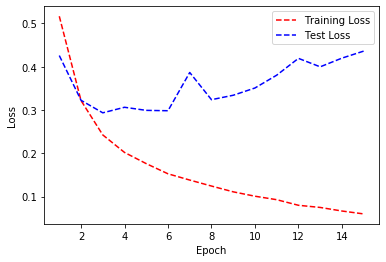

In [25]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt

np.random.seed(0)

number_of_features = 10000

(data_train,target_train), (data_test,target_test) = imdb.load_data(num_words= number_of_features)
tokenizer = Tokenizer(num_words = number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test,mode = 'binary')

network = models.Sequential()

network.add(layers.Dense(units = 16, activation = 'relu', input_shape = (number_of_features,)))

network.add(layers.Dense(units = 16, activation = 'relu'))

network.add(layers.Dense(units = 1, activation = 'sigmoid'))

network.compile(loss= 'binary_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])

history = network.fit(features_train, target_train, epochs = 15, verbose = 1, batch_size = 1000, validation_data = (features_test,target_test))

training_loss = history.history['loss']
test_loss = history.history['val_loss']

epoch_count = range(1,len(training_loss) + 1)

plt.plot(epoch_count,training_loss,'r--')
plt.plot(epoch_count, test_loss, 'b--')
plt.legend(['Training Loss','Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

NameError: name 'test_accuracy' is not defined

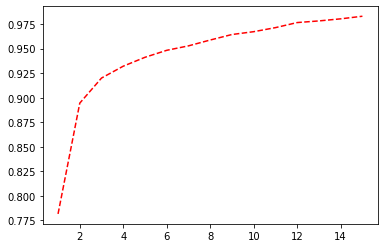

In [27]:
training_accuracy = history.history['accuracy']
test_accuaracy = history.history['val_accuracy']
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b--')

plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show();